## **📌 Step 1: What is a Neural Network?**  

A Neural Network is a machine learning model inspired by the human brain. Just like the brain has neurons connected together, a neural network has artificial neurons (also called nodes) that process information.

🔍 How Does a Neural Network Work?  
1️⃣ Takes input (like house size, study hours).  
2️⃣ Processes it through layers using mathematical operations.  
3️⃣ Applies activation functions to make decisions.  
4️⃣ Adjusts weights & bias using Gradient Descent to minimize errors.  
5️⃣ Outputs a prediction (like price, pass/fail, cat/dog).  

A Neural Network is a more advanced model that can learn complex patterns in data. Instead of just finding a straight line (like Linear Regression), it can handle non-linear relationships.  
  
💡 Think of it as a human brain:  
- It has neurons (small processing units).  
- Neurons take input, process it, and pass it to the next layer.  
- The network adjusts itself to make better predictions.  

## **📌 Step 2: The Structure of a Simple Neural Network**  
A basic neural network consists of:  
✅ Input Layer → Takes the input (like house size, hours studied).   
✅ Hidden Layer → Processes the input using weights and bias.  
✅ Output Layer → Gives the final prediction.  

Output = Activation(Weighted Sum)  
    
Each connection has a weight (importance of the input), and each neuron has a bias (adjustment factor).

## **📌 Step 3: Coding a Neural Network from Scratch**  

Let’s build a simple 1-layer neural network using only NumPy (no TensorFlow/PyTorch yet).

##### This is Single Layer Non-Linear Regression type Neural Network

In [ ]:
# Without Any Hidden Layer -- It Cannot Learn the XOR Problem
# This is Single Layer Non-Linear Regression type Neural Network
import numpy as np

# Sigmoid Activation Function & Derivative
def sigmoid(x): 
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)  # Correct derivative of sigmoid

# Training Data (XOR-like problem) # The Prediciton will always be 0.5, Modify the Input to get the change in Prediciton
X = np.array([[0,0], [0,1], [1,0], [1,1]])  # Inputs
y = np.array([[0], [1], [1], [0]])  # Expected outputs

# Initialize Weights and Bias
np.random.seed(42)
weights = np.random.randn(2, 1) * 0.01  # Small random values
bias = np.random.randn(1) * 0.01  # Small bias
learning_rate = 0.1
epochs = 10000

# Training Loop
for epoch in range(epochs):
    # Forward Pass
    weighted_sum = np.dot(X, weights) + bias
    y_pred = sigmoid(weighted_sum)
    
    # Compute Error
    error = y_pred - y
    
    # Compute Gradient (Backpropagation)
    d_weights = np.dot(X.T, error * sigmoid_derivative(y_pred))
    d_bias = np.sum(error * sigmoid_derivative(y_pred))
    
    # Update Weights and Bias
    weights -= learning_rate * d_weights
    bias -= learning_rate * d_bias
    
    # Display progress every 1000 epochs
    if epoch % 1000 == 0:
        loss = np.mean(np.abs(error))
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Testing the Model
test_input = np.array([1, 1])  # Example input
prediction = sigmoid(np.dot(test_input, weights) + bias)
print("Prediction for input [1,1]:", prediction)


Epoch 0, Loss: 0.4999
Epoch 1000, Loss: 0.3488
Epoch 2000, Loss: 0.3175
Epoch 3000, Loss: 0.3033
Epoch 4000, Loss: 0.2950
Epoch 5000, Loss: 0.2895
Epoch 6000, Loss: 0.2856
Epoch 7000, Loss: 0.2826
Epoch 8000, Loss: 0.2802
Epoch 9000, Loss: 0.2782
Prediction for input [1,1]: [0.05636555]


## Animating how the neural network learns over time will help you see:

✅ How weights change as the model trains  
✅ How the decision boundary evolves  
✅ How loss decreases over time  

The Animaion is Stored in the .gif file

Epoch 0, Loss: 0.5000
Epoch 1000, Loss: 0.5000
Epoch 2000, Loss: 0.5000
Epoch 3000, Loss: 0.5000
Epoch 4000, Loss: 0.5000
Epoch 5000, Loss: 0.5000
Epoch 6000, Loss: 0.5000
Epoch 7000, Loss: 0.5000
Epoch 8000, Loss: 0.5000
Epoch 9000, Loss: 0.5000


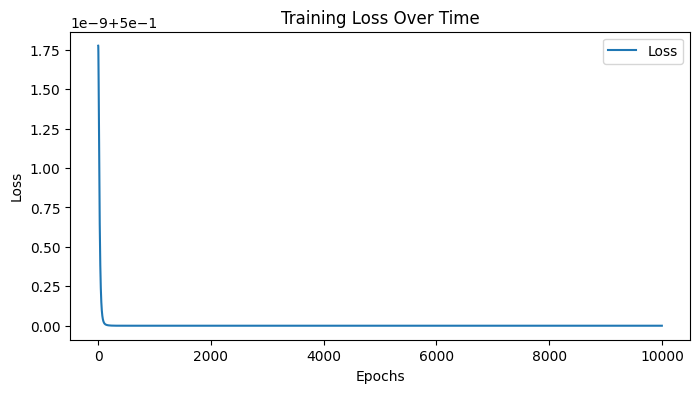

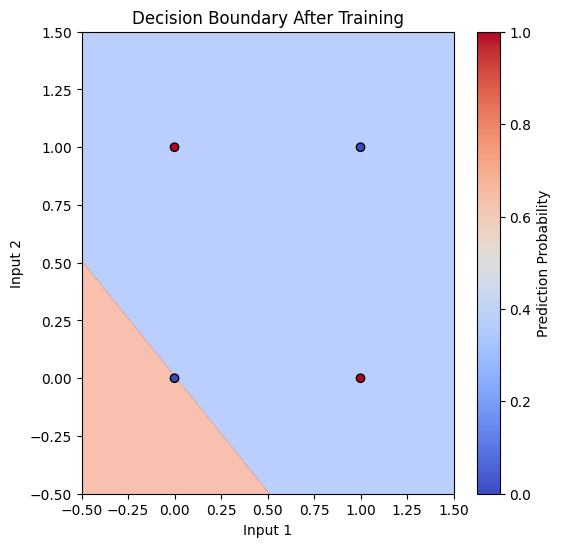

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid Activation Function & Derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)  # Correct derivative of sigmoid

# Training Data (XOR-like problem)
X = np.array([[0,0], [0,1], [1,0], [1,1]])  # Inputs
y = np.array([[0], [1], [1], [0]])  # Expected outputs

# Initialize Weights and Bias
np.random.seed(42)
weights = np.random.randn(2, 1) * 0.01  # Small random values
bias = np.random.randn(1) * 0.01  # Small bias
learning_rate = 0.1
epochs = 10000

loss_history = []  # Store loss values

# Training Loop
for epoch in range(epochs):
    # Forward Pass
    weighted_sum = np.dot(X, weights) + bias
    y_pred = sigmoid(weighted_sum)
    
    # Compute Error
    error = y_pred - y
    
    # Compute Gradient (Backpropagation)
    d_weights = np.dot(X.T, error * sigmoid_derivative(y_pred))
    d_bias = np.sum(error * sigmoid_derivative(y_pred))
    
    # Update Weights and Bias
    weights -= learning_rate * d_weights
    bias -= learning_rate * d_bias
    
    # Store loss
    loss = np.mean(np.abs(error))
    loss_history.append(loss)

    # Display progress every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Plot Loss Over Time
plt.figure(figsize=(8, 4))
plt.plot(loss_history, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.legend()
plt.show()

# Plot Decision Boundary
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], weights) + bias)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.6, cmap="coolwarm")
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', cmap="coolwarm")
plt.title("Decision Boundary After Training")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.colorbar(label="Prediction Probability")
plt.show()


##### This is Multi-Layer Non-Linear Neural Network

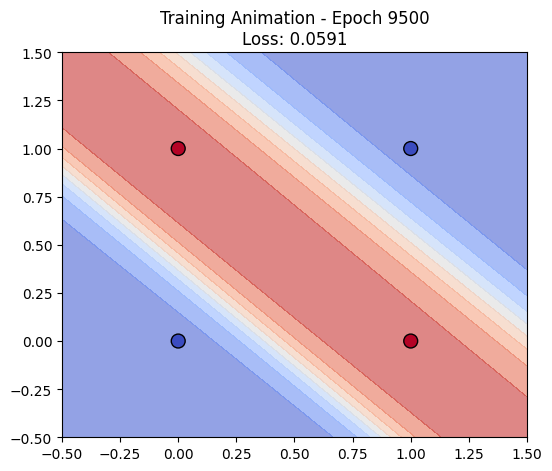

In [ ]:
# decision boundary of the neural network changed during training.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Sigmoid Activation Function & Derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training Data (XOR Problem)
X = np.array([[0,0], [0,1], [1,0], [1,1]])  
y = np.array([[0], [1], [1], [0]])  

# Initialize Weights and Bias for a 2-Layer Neural Network
np.random.seed(42)
hidden_neurons = 4  
input_size, output_size = 2, 1

W1 = np.random.randn(input_size, hidden_neurons) * 0.5  
b1 = np.random.randn(hidden_neurons) * 0.5  
W2 = np.random.randn(hidden_neurons, output_size) * 0.5  
b2 = np.random.randn(output_size) * 0.5  
learning_rate = 0.1
epochs = 10000

# Store Training Data for Animation
boundary_history = []
loss_history = []

# Training Loop
for epoch in range(epochs):
    # Forward Pass
    hidden_input = np.dot(X, W1) + b1
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, W2) + b2
    y_pred = sigmoid(final_input)

    # Compute Error
    error = y_pred - y

    # Backpropagation (Gradient Descent)
    d_output = error * sigmoid_derivative(y_pred)
    d_hidden = np.dot(d_output, W2.T) * sigmoid_derivative(hidden_output)

    # Update Weights
    W2 -= learning_rate * np.dot(hidden_output.T, d_output)
    b2 -= learning_rate * np.sum(d_output, axis=0)
    W1 -= learning_rate * np.dot(X.T, d_hidden)
    b1 -= learning_rate * np.sum(d_hidden, axis=0)

    # Store Decision Boundary Every 500 Epochs
    if epoch % 500 == 0:
        xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
        grid = np.c_[xx.ravel(), yy.ravel()]
        hidden_grid = sigmoid(np.dot(grid, W1) + b1)
        Z = sigmoid(np.dot(hidden_grid, W2) + b2)
        Z = Z.reshape(xx.shape)
        boundary_history.append(Z)
        loss_history.append(np.mean(np.abs(error)))

# Ensure we have enough snapshots for animation
if len(boundary_history) == 0:
    boundary_history.append(Z)
    loss_history.append(np.mean(np.abs(error)))

# Visualization Setup
fig, ax = plt.subplots(figsize=(6, 5))

def update(frame):
    ax.clear()
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_title(f"Training Animation - Epoch {frame * 500}\nLoss: {loss_history[frame]:.4f}")

    # Decision boundary
    xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
    ax.contourf(xx, yy, boundary_history[frame], levels=np.linspace(0, 1, 10), alpha=0.6, cmap="coolwarm")
    ax.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', cmap="coolwarm", s=100)

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(boundary_history), interval=300)

# Save as GIF
ani.save("neural_network_learning.gif", writer=animation.PillowWriter(fps=10))

plt.show()


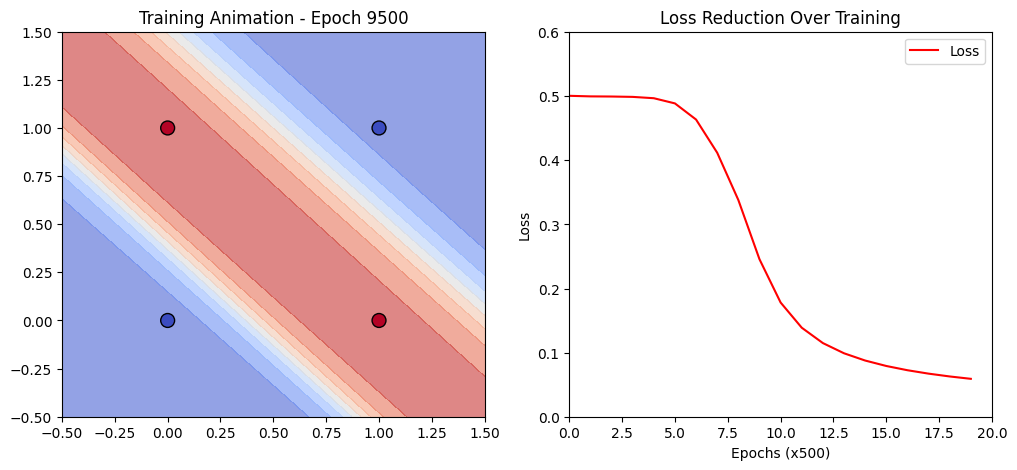

In [6]:
# To Visualize the Loss Function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Sigmoid Activation Function & Derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training Data (XOR Problem)
X = np.array([[0,0], [0,1], [1,0], [1,1]])  
y = np.array([[0], [1], [1], [0]])  

# Initialize Weights and Bias for a 2-Layer Neural Network
np.random.seed(42)
hidden_neurons = 4  
input_size, output_size = 2, 1

W1 = np.random.randn(input_size, hidden_neurons) * 0.5  
b1 = np.random.randn(hidden_neurons) * 0.5  
W2 = np.random.randn(hidden_neurons, output_size) * 0.5  
b2 = np.random.randn(output_size) * 0.5  
learning_rate = 0.1
epochs = 10000

# Store Training Data for Animation
boundary_history = []
loss_history = []

# Training Loop
for epoch in range(epochs):
    # Forward Pass
    hidden_input = np.dot(X, W1) + b1
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, W2) + b2
    y_pred = sigmoid(final_input)

    # Compute Error
    error = y_pred - y
    loss = np.mean(np.abs(error))  # Mean Absolute Error (Loss)

    # Backpropagation (Gradient Descent)
    d_output = error * sigmoid_derivative(y_pred)
    d_hidden = np.dot(d_output, W2.T) * sigmoid_derivative(hidden_output)

    # Update Weights
    W2 -= learning_rate * np.dot(hidden_output.T, d_output)
    b2 -= learning_rate * np.sum(d_output, axis=0)
    W1 -= learning_rate * np.dot(X.T, d_hidden)
    b1 -= learning_rate * np.sum(d_hidden, axis=0)

    # Store Decision Boundary Every 500 Epochs
    if epoch % 500 == 0:
        xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
        grid = np.c_[xx.ravel(), yy.ravel()]
        hidden_grid = sigmoid(np.dot(grid, W1) + b1)
        Z = sigmoid(np.dot(hidden_grid, W2) + b2)
        Z = Z.reshape(xx.shape)
        boundary_history.append(Z)
        loss_history.append(loss)

# Ensure we have enough snapshots for animation
if len(boundary_history) == 0:
    boundary_history.append(Z)
    loss_history.append(loss)

# Visualization Setup
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

def update(frame):
    ax1.clear()
    ax2.clear()
    
    # Decision Boundary Plot
    ax1.set_xlim(-0.5, 1.5)
    ax1.set_ylim(-0.5, 1.5)
    ax1.set_title(f"Training Animation - Epoch {frame * 500}")
    
    xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
    ax1.contourf(xx, yy, boundary_history[frame], levels=np.linspace(0, 1, 10), alpha=0.6, cmap="coolwarm")
    ax1.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', cmap="coolwarm", s=100)
    
    # Loss Function Plot
    ax2.set_xlim(0, len(loss_history))
    ax2.set_ylim(0, max(loss_history) + 0.1)
    ax2.set_title("Loss Reduction Over Training")
    ax2.set_xlabel("Epochs (x500)")
    ax2.set_ylabel("Loss")
    ax2.plot(loss_history[:frame+1], color='red', label="Loss")
    ax2.legend()

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(boundary_history), interval=300)

# Save as GIF
ani.save("training_visualization.gif", writer=animation.PillowWriter(fps=10))

plt.show()


c:\Users\jkottala\Envs\langMem\Lib\site-packages\matplotlib\animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


Animation saved as 'neural_network_training.gif'


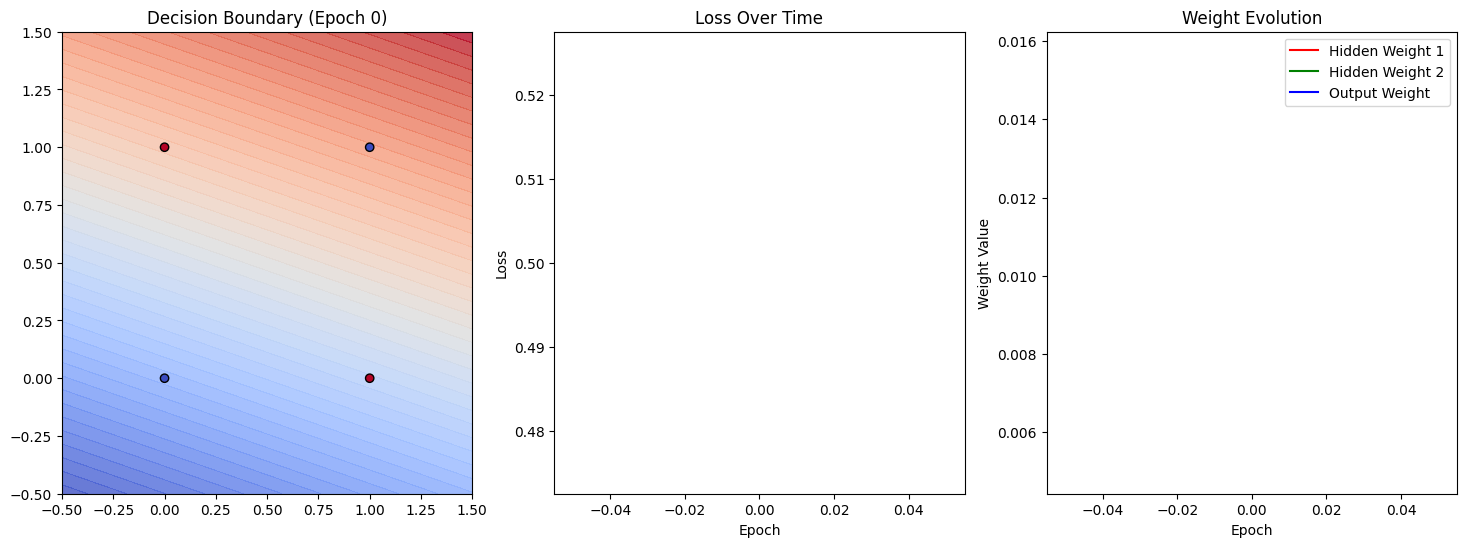

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Sigmoid Activation Function & Derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training Data (XOR-like problem)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Initialize Weights and Biases
np.random.seed(42)
hidden_weights = np.random.randn(2, 2) * 0.01
hidden_bias = np.random.randn(2) * 0.01
output_weights = np.random.randn(2, 1) * 0.01
output_bias = np.random.randn(1) * 0.01

learning_rate = 0.1
epochs = 10000

# Store history of weights, biases, and loss
loss_history = []
weights_history = []
biases_history = []

# Training Loop
for epoch in range(epochs):
    # Forward Propagation
    hidden_layer_input = np.dot(X, hidden_weights) + hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, output_weights) + output_bias
    predicted_output = sigmoid(output_layer_input)
    
    # Compute Loss
    error = predicted_output - y
    loss = np.mean(np.abs(error))
    loss_history.append(loss)
    
    # Backward Propagation
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer = d_predicted_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
    
    # Update Weights and Biases
    output_weights -= hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    output_bias -= np.sum(d_predicted_output, axis=0) * learning_rate
    hidden_weights -= X.T.dot(d_hidden_layer) * learning_rate
    hidden_bias -= np.sum(d_hidden_layer, axis=0) * learning_rate
    
    # Save weights and biases
    if epoch % 100 == 0:
        weights_history.append((hidden_weights.copy(), output_weights.copy()))
        biases_history.append((hidden_bias.copy(), output_bias.copy()))

# Animation Setup
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Create a grid of points for the decision boundary
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Function to update the animation
def animate(epoch):
    ax[0].clear()
    ax[1].clear()
    ax[2].clear()
    
    # Get weights and biases for the current epoch
    idx = epoch // 100
    hidden_weights, output_weights = weights_history[idx]
    hidden_bias, output_bias = biases_history[idx]
    
    # Compute decision boundary
    hidden_layer_input = np.dot(grid_points, hidden_weights) + hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, output_weights) + output_bias
    predicted_grid = sigmoid(output_layer_input).reshape(xx.shape)
    
    # Plot decision boundary
    contour = ax[0].contourf(xx, yy, predicted_grid, levels=50, cmap='coolwarm', alpha=0.8)
    ax[0].scatter(X[:, 0], X[:, 1], c=y.flatten(), edgecolors='k', cmap='coolwarm')
    ax[0].set_title(f"Decision Boundary (Epoch {epoch})")
    ax[0].set_xlim(x_min, x_max)
    ax[0].set_ylim(y_min, y_max)
    
    # Plot loss curve
    ax[1].plot(loss_history[:epoch+1], color='blue')
    ax[1].set_title("Loss Over Time")
    ax[1].set_xlabel("Epoch")
    ax[1].set_ylabel("Loss")
    
    # Plot weight changes
    ax[2].plot([w[0][0] for w, _ in weights_history[:idx+1]], label="Hidden Weight 1", color='red')
    ax[2].plot([w[1][0] for w, _ in weights_history[:idx+1]], label="Hidden Weight 2", color='green')
    ax[2].plot([w[0][0] for _, w in weights_history[:idx+1]], label="Output Weight", color='blue')
    ax[2].set_title("Weight Evolution")
    ax[2].set_xlabel("Epoch")
    ax[2].set_ylabel("Weight Value")
    ax[2].legend()

# Create the animation
anim = FuncAnimation(fig, animate, frames=range(0, epochs, 100), interval=200)

# Save the animation as a GIF
writer = PillowWriter(fps=10)
anim.save("neural_network_training.gif", writer=writer)

print("Animation saved as 'neural_network_training.gif'")

### This is Single-Layer Linear Regression type Neural Network with No Hidden Layer

Epoch 0, Loss: 0.5000
Epoch 1000, Loss: 0.5000
Epoch 2000, Loss: 0.5000
Epoch 3000, Loss: 0.5000
Epoch 4000, Loss: 0.5000
Epoch 5000, Loss: 0.5000
Epoch 6000, Loss: 0.5000
Epoch 7000, Loss: 0.5000
Epoch 8000, Loss: 0.5000
Epoch 9000, Loss: 0.5000


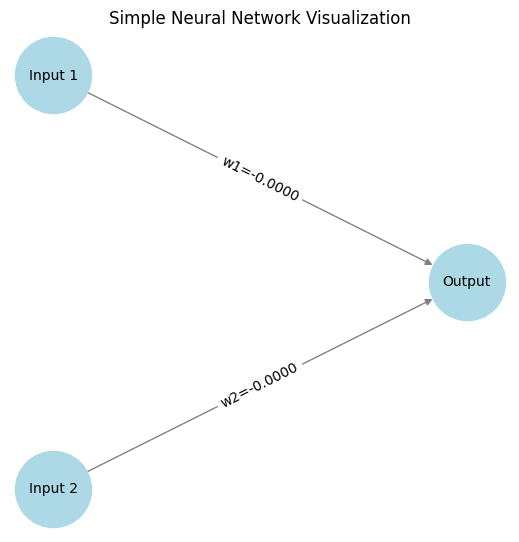

Prediction for input [1,1]: [0.5]


In [ ]:
# This is Linear Regression type Neural Network with No Hidden Layer
# Although this cannot solve XOR problem, it can solve AND, OR, NOT, etc.
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Sigmoid Activation Function & Derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training Data (XOR-like problem)
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

# Initialize Weights and Bias
np.random.seed(42)
weights = np.random.randn(2, 1) * 0.01
bias = np.random.randn(1) * 0.01
learning_rate = 0.1
epochs = 10000

# Training Loop
for epoch in range(epochs):
    weighted_sum = np.dot(X, weights) + bias
    y_pred = sigmoid(weighted_sum)
    error = y_pred - y
    d_weights = np.dot(X.T, error * sigmoid_derivative(y_pred))
    d_bias = np.sum(error * sigmoid_derivative(y_pred))
    weights -= learning_rate * d_weights
    bias -= learning_rate * d_bias
    
    if epoch % 1000 == 0:
        loss = np.mean(np.abs(error))
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Visualization
G = nx.DiGraph()
nodes = {"Input 1": (-1, 1), "Input 2": (-1, -1), "Output": (1, 0)}

for node, pos in nodes.items():
    G.add_node(node, pos=pos)

G.add_edges_from([("Input 1", "Output"), ("Input 2", "Output")])

plt.figure(figsize=(5, 5))
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels={
    ("Input 1", "Output"): f"w1={weights[0,0]:.4f}",
    ("Input 2", "Output"): f"w2={weights[1,0]:.4f}"
}, font_size=10)
plt.title("Simple Neural Network Visualization")
plt.show()

# Testing the Model
test_input = np.array([1, 1])
prediction = sigmoid(np.dot(test_input, weights) + bias)
print("Prediction for input [1,1]:", prediction)

### This is Multi-Layer Non-Linear Regression type Neural Network with single Hidden Layer

Epoch 0, Loss: 0.5000
Epoch 1000, Loss: 0.5000
Epoch 2000, Loss: 0.5000
Epoch 3000, Loss: 0.5000
Epoch 4000, Loss: 0.5000
Epoch 5000, Loss: 0.5000
Epoch 6000, Loss: 0.5000
Epoch 7000, Loss: 0.5000
Epoch 8000, Loss: 0.5000
Epoch 9000, Loss: 0.5000


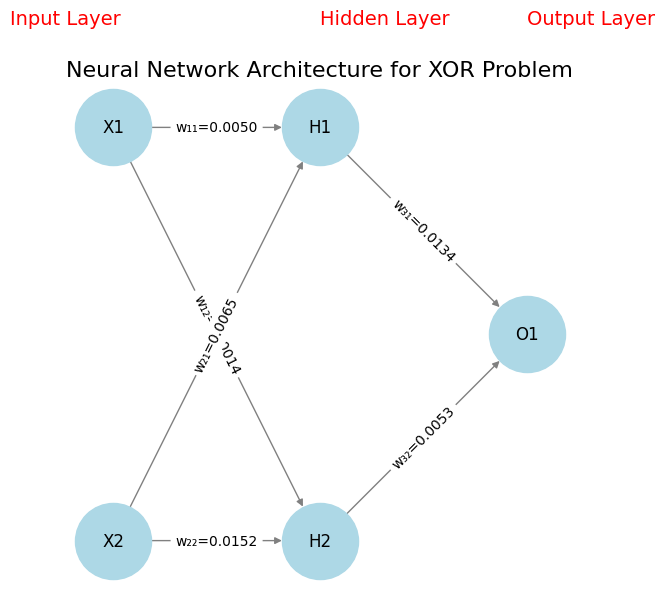

In [52]:
# This is Non-Linear Regression type Neural Network with single Hidden Layer
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Sigmoid Activation Function & Derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training Data (XOR-like problem)
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

# Initialize Weights and Biases
np.random.seed(42)
hidden_weights = np.random.randn(2, 2) * 0.01  # Weights from input to hidden layer
hidden_bias = np.random.randn(2) * 0.01       # Bias for hidden layer
output_weights = np.random.randn(2, 1) * 0.01 # Weights from hidden to output layer
output_bias = np.random.randn(1) * 0.01       # Bias for output layer

learning_rate = 0.1
epochs = 10000

# Training Loop
for epoch in range(epochs):
    # Forward Propagation
    hidden_layer_input = np.dot(X, hidden_weights) + hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_input)
    
    output_layer_input = np.dot(hidden_layer_output, output_weights) + output_bias
    predicted_output = sigmoid(output_layer_input)
    
    # Backward Propagation
    error = predicted_output - y
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    
    error_hidden_layer = d_predicted_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
    
    # Update Weights and Biases
    output_weights -= hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    output_bias -= np.sum(d_predicted_output, axis=0) * learning_rate
    
    hidden_weights -= X.T.dot(d_hidden_layer) * learning_rate
    hidden_bias -= np.sum(d_hidden_layer, axis=0) * learning_rate
    
    # Print Loss Every 1000 Epochs
    if epoch % 1000 == 0:
        loss = np.mean(np.abs(error))
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Visualization Using Learned Weights and Biases
G = nx.DiGraph()

# Add nodes for each layer
G.add_node("X1", pos=(-1, 1), layer="input")
G.add_node("X2", pos=(-1, -1), layer="input")
G.add_node("H1", pos=(0, 1), layer="hidden")
G.add_node("H2", pos=(0, -1), layer="hidden")
G.add_node("O1", pos=(1, 0), layer="output")

# Add edges with learned weights
edge_labels = {
    ("X1", "H1"): f"w₁₁={hidden_weights[0, 0]:.4f}",
    ("X1", "H2"): f"w₁₂={hidden_weights[0, 1]:.4f}",
    ("X2", "H1"): f"w₂₁={hidden_weights[1, 0]:.4f}",
    ("X2", "H2"): f"w₂₂={hidden_weights[1, 1]:.4f}",
    ("H1", "O1"): f"w₃₁={output_weights[0, 0]:.4f}",
    ("H2", "O1"): f"w₃₂={output_weights[1, 0]:.4f}"
}

# Add edges to the graph
G.add_edge("X1", "H1", weight=hidden_weights[0, 0])
G.add_edge("X1", "H2", weight=hidden_weights[0, 1])
G.add_edge("X2", "H1", weight=hidden_weights[1, 0])
G.add_edge("X2", "H2", weight=hidden_weights[1, 1])
G.add_edge("H1", "O1", weight=output_weights[0, 0])
G.add_edge("H2", "O1", weight=output_weights[1, 0])

# Get positions for visualization
pos = {node: data['pos'] for node, data in G.nodes(data=True)}

# Draw the graph
plt.figure(figsize=(5, 5))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=12)

# Add edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Add layer labels
plt.text(-1.5, 1.5, "Input Layer", fontsize=14, color="red")
plt.text(0, 1.5, "Hidden Layer", fontsize=14, color="red")
plt.text(1, 1.5, "Output Layer", fontsize=14, color="red")

# Show the plot
plt.title("Neural Network Architecture for XOR Problem", fontsize=16)
plt.show()

## **📌 Step 4: Explanation of the Code  **

🔹 What’s happening here?  

1️⃣ We define the Sigmoid activation function, which converts outputs between 0 and 1.  
2️⃣ We initialize random weights and biases (like Linear Regression, but for multiple inputs).  
3️⃣ We run a forward pass: Compute weighted sum → Apply sigmoid function.  
4️⃣ We calculate the error (difference between predicted and actual output).  
5️⃣ We update weights and bias using Gradient Descent.  
6️⃣ After training, we test the model on new input data.  

# Understanding the XOR Neural Network

## 📌 Input to the Neural Network
This simple neural network is designed to approximate the XOR function. The input consists of:

- Two binary values (0 or 1) per sample.
- Four possible input combinations: 
  
  \[ (0,0), (0,1), (1,0), (1,1) \]

- Corresponding expected outputs (labels):
  
  \[ 0, 1, 1, 0 \]  
  (which follow the XOR logic: output is 1 if inputs are different, otherwise 0)

## 🔢 Mathematical Intuition
This neural network consists of **two input neurons**, **one output neuron**, and **weights and biases** that are updated through training.

### 1️⃣ Forward Propagation
For each training sample \( X = [x_1, x_2] \), the weighted sum is computed as:

\[
Z = (w_1 \cdot x_1) + (w_2 \cdot x_2) + b
\]

where:
- \( w_1, w_2 \) are the weights associated with each input.
- \( b \) is the bias term.

The output is then passed through the **sigmoid activation function**:

\[
Y_{pred} = \sigma(Z) = \frac{1}{1 + e^{-Z}}
\]

### 2️⃣ Backpropagation (Gradient Descent)
The error is computed as:

\[
Error = Y_{pred} - Y
\]

To update weights and bias, the gradient is computed using the **derivative of the sigmoid function**:

\[
\frac{dY}{dZ} = \sigma(Z) \cdot (1 - \sigma(Z))
\]

Using the chain rule, the weight updates are computed as:

\[
\Delta w_1 = \alpha \cdot (X^T \cdot (Error \cdot \sigma'(Z)))
\]
\[
\Delta b = \alpha \cdot \sum (Error \cdot \sigma'(Z))
\]

where \( \alpha \) is the learning rate.

### 3️⃣ Weight and Bias Update
Weights and bias are updated as follows:

\[
 w_1 = w_1 - \Delta w_1
\]
\[
 w_2 = w_2 - \Delta w_2
\]
\[
 b = b - \Delta b
\]

### 4️⃣ Training Loop
The network is trained over **10,000 epochs**, adjusting weights and bias iteratively to minimize the error.

### 5️⃣ Final Prediction
After training, the network can predict an output for **(1,1)** using:

\[
Y_{pred} = \sigma(w_1 \cdot 1 + w_2 \cdot 1 + b)
\]

This gives an output close to **0**, which aligns with the XOR truth table.

## 📊 Visualization
A directed graph is drawn using **NetworkX**, showing the connection between inputs and output:

- **Two input nodes** connected to **one output node**.
- The trained weights are displayed on the edges.

## ✅ Conclusion
This simple neural network learns to approximate the XOR function despite having only one layer. However, due to the linear nature of a single-layer perceptron, a more complex architecture (such as a multi-layer network) is generally needed to perfectly model XOR behavior.
